# Skalierung
Die Bildskalierung ist eine intelligente Methode zur Vorverarbeitung von Bilddaten, idealerweise nach der Entfernung von Rauschen und Hintergrund. Sie ermöglicht es, die Bildgröße so weit zu reduzieren, dass die wissenschaftliche Fragestellung noch beantwortet werden kann, während gleichzeitig Speicherbeschränkungen berücksichtigt werden. Wenn der Computer beispielsweise über Out-of-Memory-Fehler klagt, ist die Skalierung eines Bildes auf eine kleinere Größe die erste Methode der Wahl, um mit einem Projekt fortzufahren. Darüber hinaus gibt es viele Segmentierungsalgorithmen und quantitative Messmethoden, die die Isotropie von Pixeln/Voxeln als Voraussetzung haben: Voxel müssen in allen Richtungen die gleiche Größe haben, andernfalls können die Ergebnisse solcher Algorithmen irreführend oder sogar falsch sein.

In [1]:
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt
from skimage.io import imread

Um die Skalierung zu demonstrieren, verwenden wir ein zugeschnittenes und neu abgetastetes Bilddatum aus der [Broad Bio Image Challenge](https://bbbc.broadinstitute.org/BBBC032):
Ljosa V, Sokolnicki KL, Carpenter AE (2012). Annotated high-throughput microscopy image sets for validation. Nature Methods 9(7):637 / doi. PMID: 22743765 PMCID: PMC3627348. Verfügbar unter http://dx.doi.org/10.1038/nmeth.2083

In [2]:
input_image = imread("../../data/BMP4blastocystC3-cropped_resampled_8bit.tif")

# voxel size is not equal in all directions; 
# the voxels are anisotropic.
voxel_size_x = 0.202
voxel_size_y = 0.202
voxel_size_z = 1

Bei der Visualisierung von Projektionen dieses Datensatzes entlang der drei Achsen sehen Sie, dass die Voxel nicht isotrop sind.

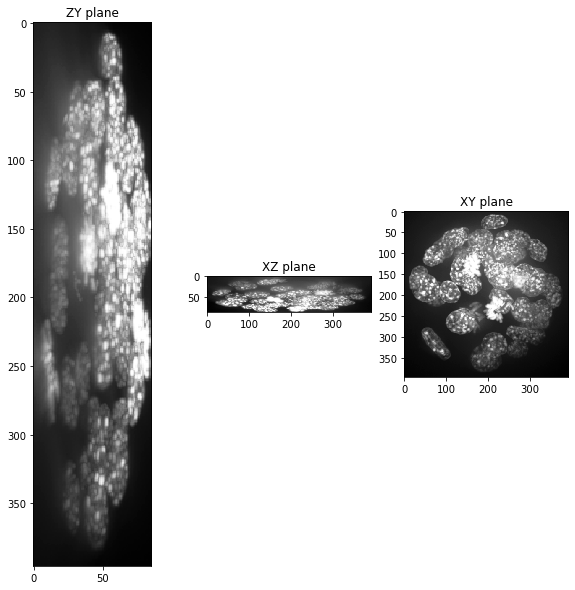

In [3]:
def show(image_to_show, labels=False):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    projection_x = cle.maximum_x_projection(image_to_show)
    projection_y = cle.maximum_y_projection(image_to_show)
    projection_z = cle.maximum_z_projection(image_to_show)

    fig, axs = plt.subplots(1, 3, figsize=(10, 10))
    cle.imshow(projection_x, plot=axs[0], labels=labels)
    cle.imshow(projection_y, plot=axs[1], labels=labels)
    cle.imshow(projection_z, plot=axs[2], labels=labels)
    axs[0].set_title("ZY plane")
    axs[1].set_title("XZ plane")
    axs[2].set_title("XY plane")
    plt.show()

show(input_image)

## Skalierung mit der Voxelgröße
Der einfachste Weg, dieses Problem zu beheben, ist, den Datensatz mit seiner Voxelgröße zu skalieren. Per Definition führt dies zu einem Datensatz, bei dem die Voxel isotrop sind und in allen Richtungen `voxel_size = 1` (in unserem Fall Mikrometer) haben.

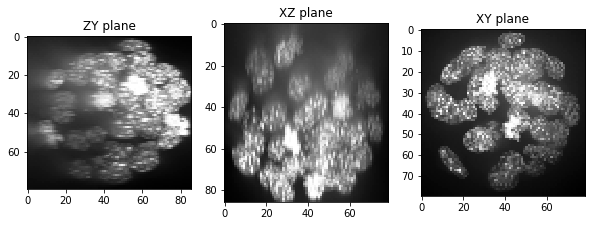

In [4]:
scale_factor_x = voxel_size_x
scale_factor_y = voxel_size_y
scale_factor_z = voxel_size_z

resampled = cle.scale(input_image, 
                      factor_x=scale_factor_x, 
                      factor_y=scale_factor_y, 
                      factor_z=scale_factor_z, 
                      linear_interpolation=True,
                      auto_size=True)

show(resampled)

Der neu abgetastete Stapel hat jetzt weniger Voxel in X und Y, was bei der genauen Segmentierung der Objekte problematisch sein könnte. Wir können dies deutlich sehen, wenn wir die Form der ursprünglichen Daten und des neu abgetasteten Bildes ausgeben. Dies ist die Größe des Bildstapels in Tiefe-Höhe-Breite (Z-Y-X).

In [5]:
input_image.shape

(86, 396, 393)

In [6]:
resampled.shape

(86, 80, 79)

Eine mögliche Lösung besteht darin, einen `zoom_factor` einzuführen. Er ermöglicht es, die Größe des neu abgetasteten Bildes anzupassen:

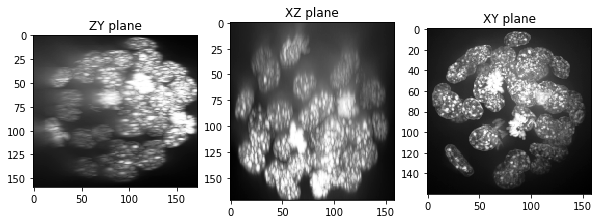

In [7]:
zoom_factor = 2

scale_factor_x = voxel_size_x * zoom_factor
scale_factor_y = voxel_size_y * zoom_factor
scale_factor_z = voxel_size_z * zoom_factor

resampled_zoomed = cle.scale(input_image, 
                      factor_x=scale_factor_x, 
                      factor_y=scale_factor_y, 
                      factor_z=scale_factor_z, 
                      linear_interpolation=True,
                      auto_size=True)

show(resampled_zoomed)

In [8]:
resampled_zoomed.shape

(172, 160, 159)

Beim Zoomen/Skalieren von 3D-Bildern sollten Sie die Speicherbegrenzungen im Auge behalten. Sie können die Größe der Bilder im Kasten rechts in der folgenden Ansicht ablesen. Das Zoomen eines Bildes um den Faktor 2, wie im obigen Beispiel, erhöht die Bildgröße eines 3D-Stapels um den Faktor 8 (2x2x2).

cl.OCLArray([[[19.976562  , 20.        , 20.12207   , ..., 20.995056  ,
         19.996155  , 19.889374  ],
        [20.        , 19.14293   , 20.074219  , ..., 20.074219  ,
         20.151886  , 20.8125    ],
        [20.        , 19.884277  , 20.        , ..., 21.69043   ,
         20.731445  , 20.113281  ],
        ...,
        [ 8.        ,  8.9878235 , 10.104492  , ...,  6.1640625 ,
          7.        ,  5.8545227 ],
        [ 8.889374  ,  8.925781  ,  8.224121  , ...,  6.6996765 ,
          5.2587585 ,  5.        ],
        [ 8.021973  ,  8.879639  ,  8.0625    , ...,  6.        ,
          5.9375    ,  5.8867188 ]],

       [[18.99945   , 19.904083  , 19.        , ..., 19.976562  ,
         19.019592  , 19.        ],
        [20.        , 19.        , 20.        , ..., 19.464783  ,
         19.151886  , 19.934189  ],
        [19.        , 19.810059  , 19.765625  , ..., 20.81543   ,
         20.        , 19.113281  ],
        ...,
        [ 8.        ,  8.226105  ,  9.104492  , ...,  6.        ,
          5.3012085 ,  5.8867188 ],
        [ 8.        ,  8.991592  ,  8.        , ...,  6.        ,
          5.7598267 ,  5.0128326 ],
        [ 8.        ,  8.        ,  8.        , ...,  5.0493164 ,
          5.052246  ,  5.        ]],

       [[18.022888  , 19.904083  , 19.020508  , ..., 18.794006  ,
         19.        , 19.        ],
        [19.        , 19.925781  , 19.189941  , ..., 20.        ,
         19.151886  , 19.        ],
        [18.023438  , 19.009277  , 19.        , ..., 20.875     ,
         19.979492  , 19.        ],
        ...,
        [ 7.996155  ,  8.773895  ,  8.979492  , ...,  5.965393  ,
          5.862854  ,  5.        ],
        [ 8.        ,  8.886719  ,  8.        , ...,  6.        ,
          5.094696  ,  5.1004486 ],
        [ 8.        ,  8.        ,  7.9921875 , ...,  5.        ,
          5.8359375 ,  5.        ]],

       ...,

       [[ 1.        ,  1.0724792 ,  1.        , ...,  2.        ,
          2.8163452 ,  2.        ],
        [ 1.9765625 ,  1.9944916 ,  1.875     , ...,  2.195282  ,
          2.        ,  2.        ],
        [ 1.0205078 ,  1.8100586 ,  2.        , ...,  2.9013672 ,
          2.2480469 ,  2.224121  ],
        ...,
        [ 0.9804077 ,  2.        ,  1.        , ...,  2.965393  ,
          2.8359375 ,  2.        ],
        [ 0.13406372,  0.24490356,  1.        , ...,  2.1870422 ,
          2.1454773 ,  2.        ],
        [ 1.        ,  1.        ,  1.        , ...,  2.        ,
          1.2163086 ,  2.        ]],

       [[ 1.9536743 ,  1.0742188 ,  1.        , ...,  2.0049438 ,
          2.        ,  2.        ],
        [ 1.0724792 ,  1.        ,  1.        , ...,  2.        ,
          2.        ,  1.1790924 ],
        [ 1.1220703 ,  1.1157227 ,  1.875     , ...,  2.7890625 ,
          2.        ,  2.        ],
        ...,
        [ 1.        ,  1.0620422 ,  1.7314453 , ...,  2.965393  ,
          2.725708  ,  2.0185852 ],
        [ 1.        ,  1.        ,  1.875     , ...,  2.        ,
          2.0185852 ,  2.1004486 ],
        [ 0.97802734,  1.9375    ,  1.        , ...,  2.        ,
          2.        ,  1.9445801 ]],

       [[ 1.9536743 ,  1.        ,  1.0205078 , ...,  2.0049438 ,
          2.        ,  2.        ],
        [ 1.        ,  1.0055084 ,  1.0742188 , ...,  2.7304993 ,
          2.9379578 ,  1.9341888 ],
        [ 0.8779297 ,  1.        ,  1.890625  , ...,  2.9013672 ,
          2.        ,  2.875     ],
        ...,
        [ 1.        ,  1.151886  ,  1.0205078 , ...,  3.        ,
          2.862854  ,  2.0185852 ],
        [ 0.0234375 ,  0.93418884,  1.        , ...,  2.7890625 ,
          2.        ,  2.        ],
        [ 1.        ,  1.0578613 ,  1.        , ...,  2.7890625 ,
          2.        ,  2.        ]]], dtype=float32)
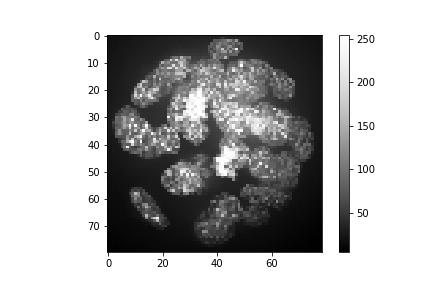
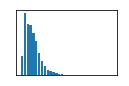

In [9]:
resampled

cl.OCLArray([[[14.25      , 14.25      , 14.826965  , ..., 14.25      ,
         14.736328  , 13.757721  ],
        [14.961914  , 14.25      , 15.        , ..., 14.841797  ,
         14.25      , 14.351715  ],
        [14.803711  , 14.65686   , 14.838867  , ..., 14.941406  ,
         14.583252  , 14.871094  ],
        ...,
        [ 6.359047  ,  6.        ,  6.1812744 , ...,  3.75      ,
          3.8426971 ,  4.4164124 ],
        [ 6.587448  ,  6.        ,  6.088623  , ...,  3.75      ,
          3.9683533 ,  4.2643433 ],
        [ 5.94096   ,  6.        ,  6.        , ...,  3.75      ,
          3.6037216 ,  4.1842804 ]],

       [[18.846611  , 19.        , 19.576965  , ..., 18.78125   ,
         19.398438  , 18.25772   ],
        [19.698112  , 19.155655  , 19.802734  , ..., 19.591797  ,
         18.76854   , 19.13562   ],
        [19.594727  , 19.40686   , 19.588867  , ..., 19.623047  ,
         19.444702  , 19.871094  ],
        ...,
        [ 8.31662   ,  8.        ,  8.153809  , ...,  5.        ,
          5.2548065 ,  5.6664124 ],
        [ 8.587448  ,  7.7929688 ,  8.088623  , ...,  5.005371  ,
          5.3526    ,  5.5143433 ],
        [ 7.8952103 ,  7.940666  ,  8.        , ...,  5.        ,
          4.9151764 ,  5.2895203 ]],

       [[18.539833  , 19.        , 19.192322  , ..., 18.34375   ,
         18.898438  , 18.085907  ],
        [19.1959    , 19.466965  , 19.408203  , ..., 19.197266  ,
         18.305618  , 19.13562   ],
        [19.307617  , 19.13562   , 19.19629   , ..., 19.02539   ,
         19.445435  , 19.957031  ],
        ...,
        [ 7.992401  ,  8.        ,  7.9780273 , ...,  5.        ,
          5.517227  ,  5.2221375 ],
        [ 8.195816  ,  7.3789062 ,  8.029541  , ...,  5.0161133 ,
          5.475525  ,  5.1714478 ],
        [ 7.843071  ,  7.8219986 ,  8.        , ...,  5.        ,
          5.135605  ,  4.7104797 ]],

       ...,

       [[ 1.0171242 ,  1.        ,  1.3806763 , ...,  2.171753  ,
          2.042427  ,  2.0112457 ],
        [ 1.7890625 ,  1.        ,  1.        , ...,  2.09375   ,
          2.0185394 ,  2.        ],
        [ 0.9795532 ,  1.7768555 ,  1.2792969 , ...,  2.0507812 ,
          2.        ,  2.        ],
        ...,
        [ 1.0230026 ,  1.2080536 ,  1.        , ...,  2.        ,
          2.        ,  2.2911377 ],
        [ 0.50772095,  0.97280884,  1.        , ...,  2.0375977 ,
          2.        ,  2.5143433 ],
        [ 0.9444847 ,  0.87722015,  1.0516968 , ...,  2.        ,
          1.9512405 ,  1.8131866 ]],

       [[ 1.0513725 ,  1.        ,  1.1268921 , ...,  2.057251  ,
          2.1272812 ,  2.0337372 ],
        [ 1.7890625 ,  1.        ,  1.        , ...,  2.03125   ,
          2.0556183 ,  2.        ],
        [ 0.93865967,  1.6206055 ,  1.4082031 , ...,  2.0742188 ,
          2.        ,  2.        ],
        ...,
        [ 1.0690079 ,  1.0693512 ,  1.        , ...,  2.        ,
          2.        ,  2.2911377 ],
        [ 0.835907  ,  0.9909363 ,  1.        , ...,  2.112793  ,
          2.        ,  2.1714478 ],
        [ 0.83345413,  0.75855255,  1.1550903 , ...,  2.        ,
          1.8537216 ,  1.9377289 ]],

       [[ 0.8013725 ,  0.75      ,  0.75      , ...,  1.5       ,
          1.6272812 ,  1.5337372 ],
        [ 1.3417969 ,  0.75      ,  0.75      , ...,  1.5       ,
          1.5556183 ,  1.5       ],
        [ 0.68865967,  1.1568604 ,  1.1044922 , ...,  1.5644531 ,
          1.5       ,  1.5       ],
        ...,
        [ 0.8190079 ,  0.75      ,  0.75      , ...,  1.5       ,
          1.5       ,  1.7183533 ],
        [ 0.75      ,  0.75      ,  0.75      , ...,  1.612793  ,
          1.5       ,  1.5       ],
        [ 0.58345413,  0.52441406,  0.90509033, ...,  1.5       ,
          1.3537216 ,  1.5       ]]], dtype=float32)
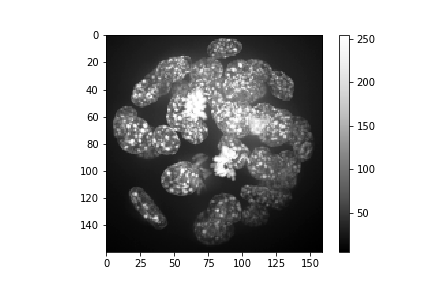
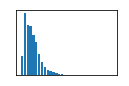

In [10]:
resampled_zoomed

## Übung 
Erhöhen Sie den Zoom-Faktor und führen Sie den obigen Code erneut aus. Bei welchem Zoom-Faktor stürzt das Programm ab? Wie groß wäre das Bild, das generiert würde, wenn es nicht abstürzen würde? Wie viel Speicher hat Ihre Grafikkarte?